In [1]:
# -*- coding: utf-8 -*-
# Licensed under a 3-clause BSD style license - see LICENSE.rst
import logging
import os
import warnings
from collections import OrderedDict
from multiprocessing import Pool

import astropy
from astropy.table import Table, hstack
import astropy.units as u
from astropy.io import ascii
from astropy.constants import alpha, c, e, hbar, m_e, m_p, sigma_sb
from astropy.utils.data import get_pkg_data_filename

import numpy as np
import matplotlib.pyplot as plt

from Validator import (
    validate_array,
    validate_physical_type,
    validate_scalar,
)
#from .model_utils import memoize
from Utils import trapz_loglog

import Models
import Radiative

from astropy.units import def_physical_type
def_physical_type(u.Unit("1 / eV"), "differential energy")

In [2]:
# Definiamo i parametri del modello
amplitude = 1e36* u.Unit('1/eV')
#amplitude = 1.0 * u.Unit('1/eV')
e_0 = 1.0 * u.TeV  # Energia di riferimento
alpha_1 = 2.0
alpha_2= 3.5
e_cut=13*u.TeV
e_break= 2*u.TeV #3.0*u.TeV
beta=1

# Creiamo un'istanza della classe
PL= Models.PowerLaw(amplitude, e_0, alpha_1)
BPL=Models.BrokenPowerLaw(amplitude, e_0,e_break, alpha_1, alpha_2)

ECPL=Models.ExponentialCutoffPowerLaw(amplitude, e_0, alpha_1,e_cut)
ECBPL=Models.ExponentialCutoffBrokenPowerLaw(amplitude, e_0,e_break, alpha_1, alpha_2,e_cut)


In [3]:
print(PL._calc(1.0*u.TeV))
print(BPL._calc(1.0*u.TeV))
print(ECPL._calc(1.0*u.TeV))
print(ECBPL._calc(1.0*u.TeV))


1e+36 1 / eV
1e+36 1 / eV
9.259610786423161e+35 1 / eV
9.259610786423161e+35 1 / eV


In [ ]:
print(PL(1.0*u.TeV)) # using __call__
print(BPL(1.0*u.TeV)) # using __call__
print(ECPL(1.0*u.TeV)) # using __call__
print(ECBPL(1.0*u.TeV)) # using __call__

## Electron distributions

<function matplotlib.pyplot.show(*args, **kw)>

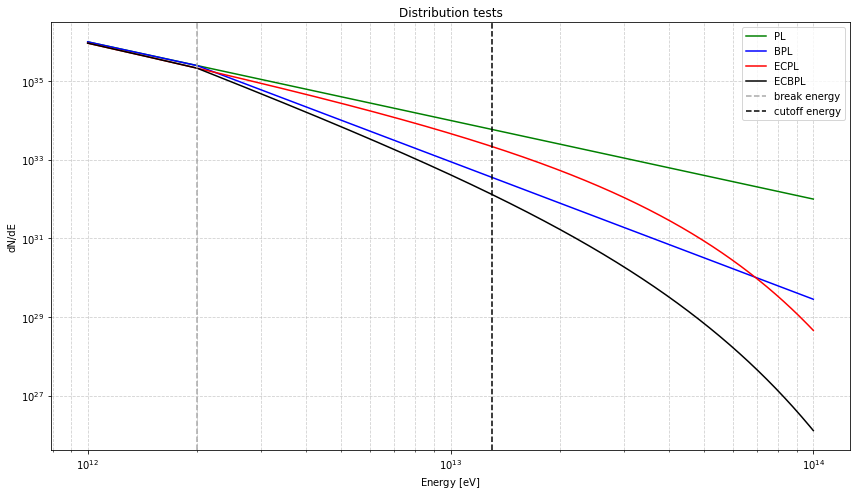

In [5]:
#energy_values = np.logspace(0.2, 0.7, 100) * u.TeV  # Da 0.1 a 100 TeV
energy_values = np.logspace(12,14,1000)*u.eV

flux1=PL(energy_values)
flux2=BPL(energy_values)
flux3=ECPL(energy_values)
flux4=ECBPL(energy_values)

plt.figure(figsize=[12,7])
plt.plot(energy_values,flux1,color="green",label="PL")
plt.plot(energy_values,flux2,color="blue",label="BPL")
plt.plot(energy_values,flux3,color="red",label="ECPL")
plt.plot(energy_values,flux4,color="black",label="ECBPL")

plt.axvline(e_break.to(u.eV).value, color='darkgray', linestyle='--', label="break energy")
plt.axvline(e_cut.to(u.eV).value, color='black', linestyle='--', label="cutoff energy")
            
plt.xscale('log')
#plt.ylim(1e-2,1e0)
plt.yscale('log')
plt.legend()

plt.title( r'Distribution tests')
plt.xlabel('Energy [{0}]'.format(energy_values.unit.to_string('latex_inline')))
plt.ylabel('dN/dE')
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

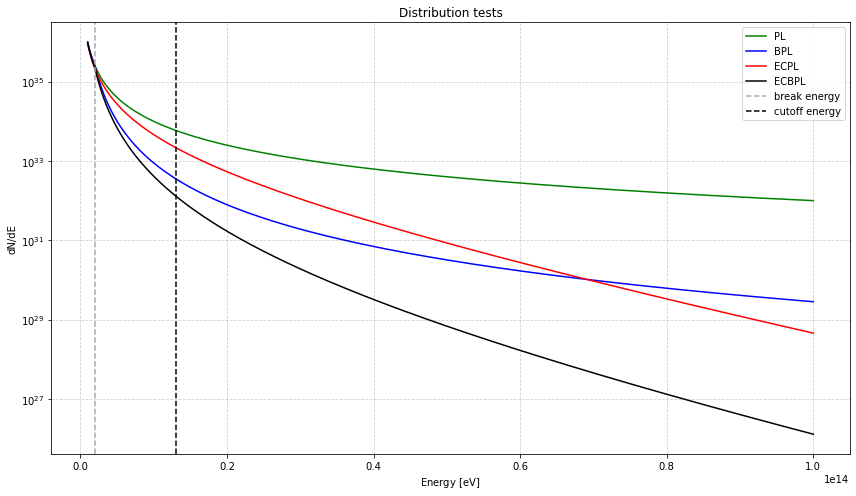

In [6]:
plt.figure(figsize=[12,7])
plt.plot(energy_values,flux1,color="green",label="PL")
plt.plot(energy_values,flux2,color="blue",label="BPL")
plt.plot(energy_values,flux3,color="red",label="ECPL")
plt.plot(energy_values,flux4,color="black",label="ECBPL")

plt.axvline(e_break.to(u.eV).value, color='darkgray', linestyle='--', label="break energy")
plt.axvline(e_cut.to(u.eV).value, color='black', linestyle='--', label="cutoff energy")
            
#plt.xscale('log')
#plt.ylim(1e-2,1e0)
plt.yscale('log')
plt.legend()

plt.title( r'Distribution tests')
plt.xlabel('Energy [{0}]'.format(energy_values.unit.to_string('latex_inline')))
plt.ylabel('dN/dE')
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show

## Synchtron emission

In [7]:
import Radiative 

lunghezza_colori = 6

cmap1 = plt.cm.viridis  
colori1 = [cmap1(i) for i in np.linspace(0.3, 0.8, lunghezza_colori)]

cmap2= plt.cm.plasma
colori2 = [cmap2(i) for i in np.linspace(0.3, 0.8, lunghezza_colori)]

# Definiamo i parametri del modello
amplitude = 1e36 *u.Unit('1/eV')
e_0 = 1*u.TeV  # Energia di riferimento
alpha_1 = 2.1
alpha_2= 3.5

e_cut1=13*u.TeV
e_cut2=6*u.TeV

e_break=2.0*u.TeV
B_field=100*u.uG


PL = Models.PowerLaw(amplitude,e_0,alpha_1)
ECPL = Models.ExponentialCutoffPowerLaw(amplitude, e_0, alpha_1, e_cut1)
ECPL2= Models.ExponentialCutoffPowerLaw(amplitude, e_0, alpha_1, e_cut2)

SYN = Radiative.Synchrotron(PL, B=B_field)
SYN2= Radiative.Synchrotron(ECPL, B=B_field)
SYN3= Radiative.Synchrotron(ECPL2, B=B_field)

#Broken power
ECBPL1 = Models.ExponentialCutoffBrokenPowerLaw(amplitude, e_0, e_break,alpha_1,alpha_2,e_cutoff=e_cut1)
ECBPL2 = Models.ExponentialCutoffBrokenPowerLaw(amplitude, e_0, e_break,alpha_1,alpha_2,e_cutoff=e_cut2)


SYN4= Radiative.Synchrotron(ECBPL1, B=B_field)
SYN5= Radiative.Synchrotron(ECBPL2, B=B_field)

<function matplotlib.pyplot.show(*args, **kw)>

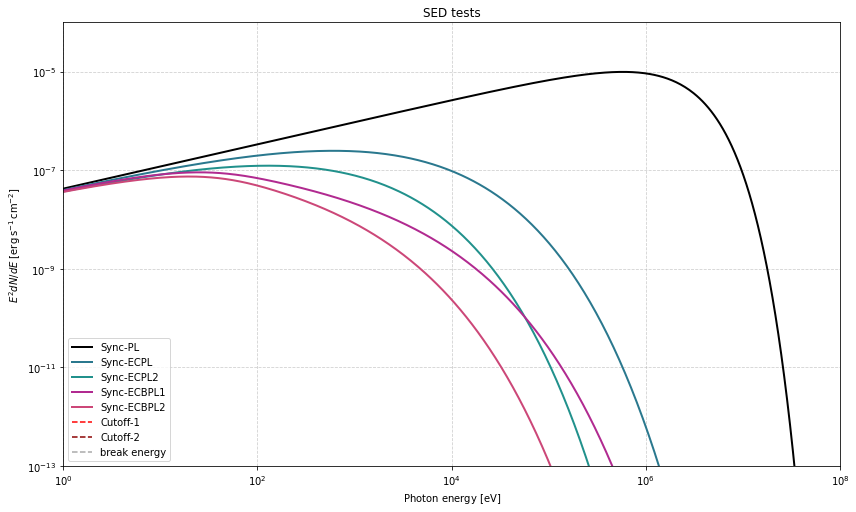

In [8]:

# Compute SEDs
spectrum_energy = np.logspace(-1,14,1000)*u.eV
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN2 = SYN2.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN3 = SYN3.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN4 = SYN4.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN5 = SYN5.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(12,7))
#plt.rc('font', family='sans')
#plt.rc('mathtext', fontset='custom')

plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync-PL',c="black")
plt.loglog(spectrum_energy,sed_SYN2,lw=2,label='Sync-ECPL',c=colori1[1])
plt.loglog(spectrum_energy,sed_SYN3,lw=2,label='Sync-ECPL2',c=colori1[2])

plt.loglog(spectrum_energy,sed_SYN4,lw=2,label='Sync-ECBPL1',c=colori2[1])
plt.loglog(spectrum_energy,sed_SYN5,lw=2,label='Sync-ECBPL2',c=colori2[2])

plt.axvline(e_cut1.to(u.eV).value, color='red', linestyle='--', label="Cutoff-1") 
plt.axvline(e_cut2.to(u.eV).value, color='darkred', linestyle='--', label="Cutoff-2") 

plt.axvline(e_break.to(u.eV).value, color='darkgray', linestyle='--', label="break energy") 

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-13, 1e-4)
plt.xlim(1e0, 1e8)
plt.tight_layout()
plt.legend(loc='lower left')
plt.legend(loc='lower left')


plt.title( r'SED tests')

plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

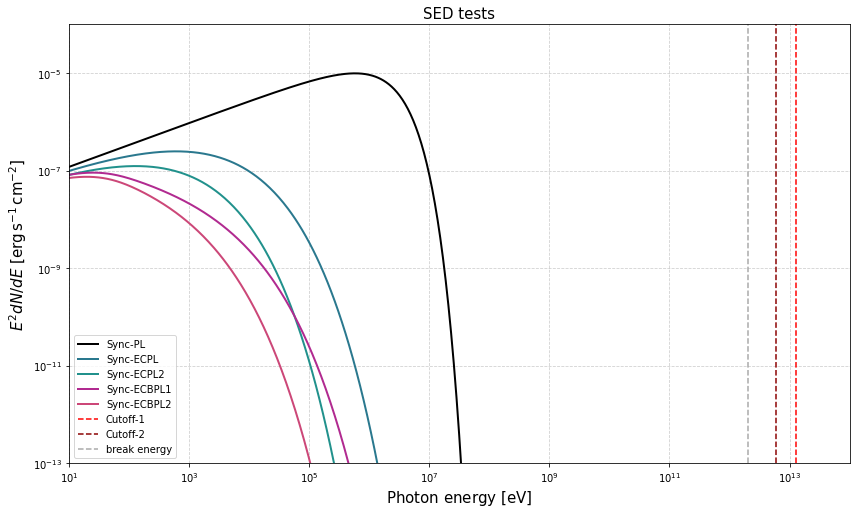

In [11]:
# Plot
plt.figure(figsize=(12,7))
#plt.rc('font', family='sans')
#plt.rc('mathtext', fontset='custom')

plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync-PL',c="black")
plt.loglog(spectrum_energy,sed_SYN2,lw=2,label='Sync-ECPL',c=colori1[1])
plt.loglog(spectrum_energy,sed_SYN3,lw=2,label='Sync-ECPL2',c=colori1[2])

plt.loglog(spectrum_energy,sed_SYN4,lw=2,label='Sync-ECBPL1',c=colori2[1])
plt.loglog(spectrum_energy,sed_SYN5,lw=2,label='Sync-ECBPL2',c=colori2[2])

plt.axvline(e_cut1.to(u.eV).value, color='red', linestyle='--', label="Cutoff-1") 
plt.axvline(e_cut2.to(u.eV).value, color='darkred', linestyle='--', label="Cutoff-2") 

plt.axvline(e_break.to(u.eV).value, color='darkgray', linestyle='--', label="break energy") 

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(sed_SYN.unit.to_string('latex_inline')),fontsize=15)
plt.ylim(1e-13, 1e-4)
plt.xlim(1e1, 1e14)
plt.tight_layout()
plt.legend(loc='lower left')
plt.legend(loc='lower left')


plt.title( r'SED tests',fontsize=15)

plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

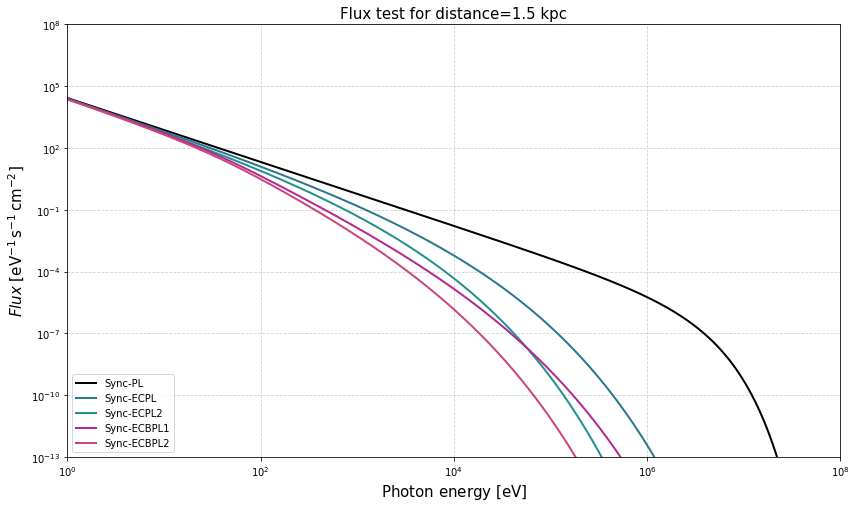

In [12]:
# Compute fluxs
spectrum_energy = np.logspace(-1,14,1000)*u.eV
dist=1.5*u.kpc

flux_SYN = SYN.flux(spectrum_energy, distance=dist)
flux_SYN2 = SYN2.flux(spectrum_energy, distance=dist)
flux_SYN3 = SYN3.flux(spectrum_energy, distance=dist)
flux_SYN4 = SYN4.flux(spectrum_energy, distance=dist)
flux_SYN5 = SYN5.flux(spectrum_energy, distance=dist)


# Plot
plt.figure(figsize=(12,7))
#plt.rc('font', family='sans')
#plt.rc('mathtext', fontset='custom')

plt.loglog(spectrum_energy,flux_SYN,lw=2,label='Sync-PL',c="black")
plt.loglog(spectrum_energy,flux_SYN2,lw=2,label='Sync-ECPL',c=colori1[1])
plt.loglog(spectrum_energy,flux_SYN3,lw=2,label='Sync-ECPL2',c=colori1[2])

plt.loglog(spectrum_energy,flux_SYN4,lw=2,label='Sync-ECBPL1',c=colori2[1])
plt.loglog(spectrum_energy,flux_SYN5,lw=2,label='Sync-ECBPL2',c=colori2[2])

#plt.axvline(e_cut1.value, color='red', linestyle='--', label="Cutoff-1") 
#plt.axvline(e_cut2.value, color='darkred', linestyle='--', label="Cutoff-2") 

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$Flux$ [{0}]'.format(flux_SYN.unit.to_string('latex_inline')),fontsize=15)
plt.ylim(1e-13, 1e8)
plt.xlim(1e0, 1e8)
plt.tight_layout()
plt.legend(loc='lower left')
plt.legend(loc='lower left')


plt.title(f"Flux test for distance={dist}",fontsize=15)

plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

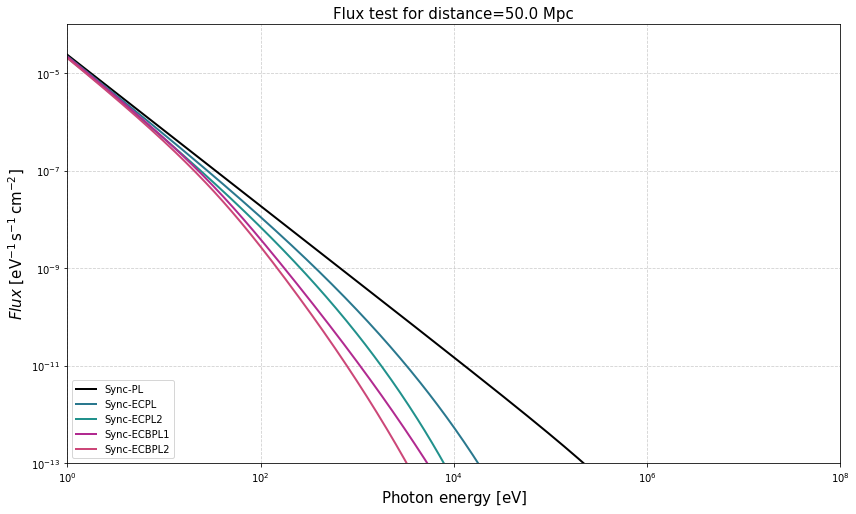

In [13]:
# Compute fluxs
spectrum_energy = np.logspace(-1,14,1000)*u.eV
dist=50*u.Mpc

flux_SYN = SYN.flux(spectrum_energy, distance=dist)
flux_SYN2 = SYN2.flux(spectrum_energy, distance=dist)
flux_SYN3 = SYN3.flux(spectrum_energy, distance=dist)
flux_SYN4 = SYN4.flux(spectrum_energy, distance=dist)
flux_SYN5 = SYN5.flux(spectrum_energy, distance=dist)


# Plot
plt.figure(figsize=(12,7))
#plt.rc('font', family='sans')
#plt.rc('mathtext', fontset='custom')

plt.loglog(spectrum_energy,flux_SYN,lw=2,label='Sync-PL',c="black")
plt.loglog(spectrum_energy,flux_SYN2,lw=2,label='Sync-ECPL',c=colori1[1])
plt.loglog(spectrum_energy,flux_SYN3,lw=2,label='Sync-ECPL2',c=colori1[2])

plt.loglog(spectrum_energy,flux_SYN4,lw=2,label='Sync-ECBPL1',c=colori2[1])
plt.loglog(spectrum_energy,flux_SYN5,lw=2,label='Sync-ECBPL2',c=colori2[2])


#plt.axvline(e_cut1.value, color='red', linestyle='--', label="Cutoff-1") 
#plt.axvline(e_cut2.value, color='darkred', linestyle='--', label="Cutoff-2") 

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$Flux$ [{0}]'.format(flux_SYN.unit.to_string('latex_inline')),fontsize=15)
plt.ylim(1e-13, 1e-4)
plt.xlim(1e0, 1e8)
plt.tight_layout()
plt.legend(loc='lower left')
plt.legend(loc='lower left')


plt.title(f"Flux test for distance={dist}",fontsize=15)

plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show

## Inverse Compton emission

In [14]:
# Definiamo i parametri del modello
amplitude = 1e36 *u.Unit('1/eV')
e_0 = 1*u.TeV  # Energia di riferimento
alpha_1 = 2.1
alpha_2= 3.5

e_cut1=13*u.TeV
e_cut2=6*u.TeV

e_break=2.0*u.TeV
B_field=100*u.uG

#--------------------- A string equal to radiation fields: --------------------------------------------------------------------#
#                                                                                                                              #
#      "CMB" (default, Cosmic Microwave Background),2.72 K, energy densitiy of 0.261 eV/cm³                                    #
#      "NIR" (Near Infrared Radiation),  30 K, energy densitiy 0.5 eV/cm³                                                      #
#      "FIR" (Far Infrared Radiation), 3000 K,energy densitiy 1 eV/cm³                                                         #
#                                                                                                                              #
#      "mode NIR" ['NIR', 50 * u.K, 1.5 * u.eV / u.cm**3].                                                                     #
#      "hot, bright star at 120 degrees to the line-of-sight": ['star', 25000 * u.K, 3 * u.erg / u.cm**3, 120 * u.deg].        #
#      "emitter with spectral index 2 between 1 and 10 keV": ['X-ray', [1, 10] * u.keV, [1, 1e-2] * 1 / (u.eV * u.cm**3)].     #
#      "monochromatic photon field at 50 eV": ['UV', 50 * u.eV, 15 * u.eV / u.cm**3].                                          #
#                                                                                                                              #
#------------------------------------------------------------------------------------------------------------------------------#

PL = Models.PowerLaw(amplitude,e_0,alpha_1)
ECPL = Models.ExponentialCutoffPowerLaw(amplitude, e_0, alpha_1, e_cut1)
ECPL2= Models.ExponentialCutoffPowerLaw(amplitude, e_0, alpha_1, e_cut2)

IC=Radiative.InverseCompton(PL, seed_photon_fields=['CMB', 'FIR', 'NIR'])
IC2=Radiative.InverseCompton(ECPL,  seed_photon_fields=['CMB', 'FIR', 'NIR'])
IC3=Radiative.InverseCompton(ECPL2,  seed_photon_fields=['CMB', 'FIR', 'NIR'])

#Broken power
ECBPL1 = Models.ExponentialCutoffBrokenPowerLaw(amplitude, e_0, e_break,alpha_1,alpha_2,e_cutoff=e_cut1)
ECBPL2 = Models.ExponentialCutoffBrokenPowerLaw(amplitude, e_0, e_break,alpha_1,alpha_2,e_cutoff=e_cut2)


IC4=Radiative.InverseCompton(ECBPL1, seed_photon_fields=['CMB', 'FIR', 'NIR'])
IC5=Radiative.InverseCompton(ECBPL2, seed_photon_fields=['CMB', 'FIR', 'NIR'])

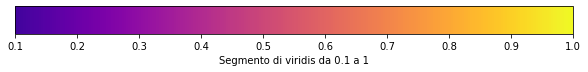

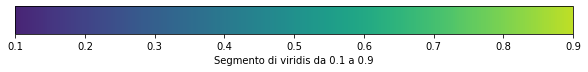

In [16]:

from matplotlib import cm
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

vmin = 0.1
vmax = 1
original_cmap = plt.cm.plasma

cmap1 = truncate_colormap(original_cmap, vmin, vmax)
fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)
norm = Normalize(vmin, vmax)  # da 0 a 1 perché stai solo mostrando il segmento
cb = ColorbarBase(ax,cmap=cmap1,norm=norm,orientation='horizontal')
cb.set_label(f'Segmento di viridis da {vmin} a {vmax}')
plt.show()

vmin = 0.1
vmax = 0.9
original_cmap2 = plt.cm.viridis

cmap2 = truncate_colormap(original_cmap2, vmin, vmax)
fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)
norm = Normalize(vmin, vmax)  # da 0 a 1 perché stai solo mostrando il segmento
cb = ColorbarBase(ax,cmap=cmap2,norm=norm,orientation='horizontal')
cb.set_label(f'Segmento di viridis da {vmin} a {vmax}')
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

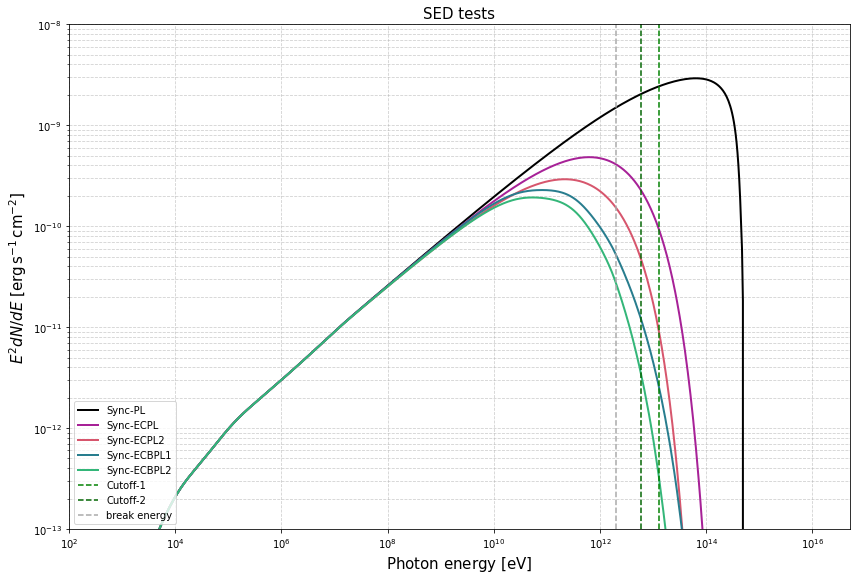

In [19]:

# Compute SEDs
spectrum_energy = np.logspace(-1,16,1000)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_IC2 = IC2.sed(spectrum_energy, distance=1.5*u.kpc)
sed_IC3 = IC3.sed(spectrum_energy, distance=1.5*u.kpc)
sed_IC4 = IC4.sed(spectrum_energy, distance=1.5*u.kpc)
sed_IC5 = IC5.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(12,8))
#plt.rc('font', family='sans')
#plt.rc('mathtext', fontset='custom')

plt.loglog(spectrum_energy,sed_IC,lw=2,label='Sync-PL',c="black")
plt.loglog(spectrum_energy,sed_IC2,lw=2,label='Sync-ECPL',c=cmap1(0.3))
plt.loglog(spectrum_energy,sed_IC3,lw=2,label='Sync-ECPL2',c=cmap1(0.5))

plt.loglog(spectrum_energy,sed_IC4,lw=2,label='Sync-ECBPL1',c=cmap2(0.4))
plt.loglog(spectrum_energy,sed_IC5,lw=2,label='Sync-ECBPL2',c=cmap2(0.7))

plt.axvline(e_cut1.to(u.eV).value, color='green', linestyle='--', label="Cutoff-1") 
plt.axvline(e_cut2.to(u.eV).value, color='darkgreen', linestyle='--', label="Cutoff-2") 

plt.axvline(e_break.to(u.eV).value, color='darkgray', linestyle='--', label="break energy") 

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(sed_IC.unit.to_string('latex_inline')),fontsize=15)
plt.ylim(1e-13, 1e-8)
plt.xlim(1e2, 5e16)
plt.tight_layout()
plt.legend(loc='lower left')
plt.legend(loc='lower left')


plt.title( r'SED tests',fontsize=15)

plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show

In [ ]:

IC = naima.models.InverseCompton(ECPL, seed_photon_fields=['CMB', 'FIR', 'NIR'])
IC.particle_distribution.index = 1.8


# Compute SEDs
spectrum_energy = np.logspace(-1,14,1000)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(8,5))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')
for seed, ls in zip(['CMB', 'FIR', 'NIR'], ['-','--',':']):
    sed = IC.sed(spectrum_energy, seed=seed, distance=1.5*u.kpc)
    plt.loglog(spectrum_energy,sed,lw=1,
            ls=ls,label='IC ({0})'.format(seed),c='0.25')
plt.loglog(spectrum_energy,sed_IC,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=naima.plot.color_cycle[1])
plt.xlabel('Photon energy [{0}]'.format(
        spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(
        sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-13, 1e-6)
plt.tight_layout()
plt.legend(loc='lower left')